In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
train = pd.read_csv('/content/train (1).csv',index_col='Id')
test = pd.read_csv('/content/test (1).csv',index_col='Id')

train.shape, test.shape

((1460, 80), (1459, 79))

In [ ]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

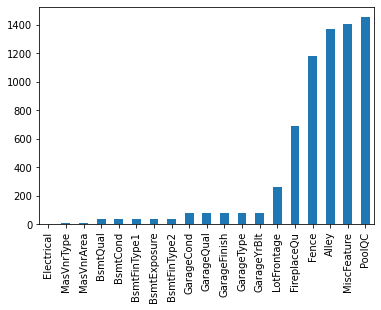

In [ ]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

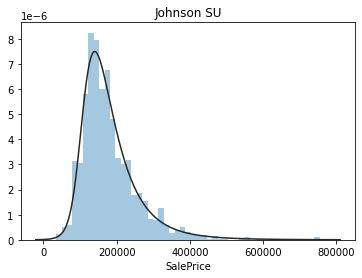

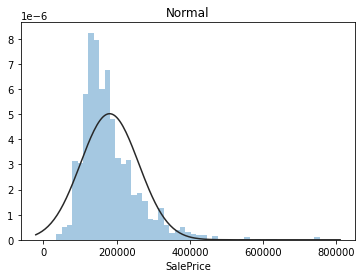

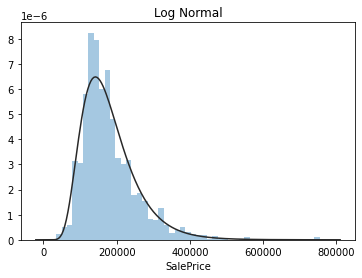

In [ ]:
import scipy.stats as st
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

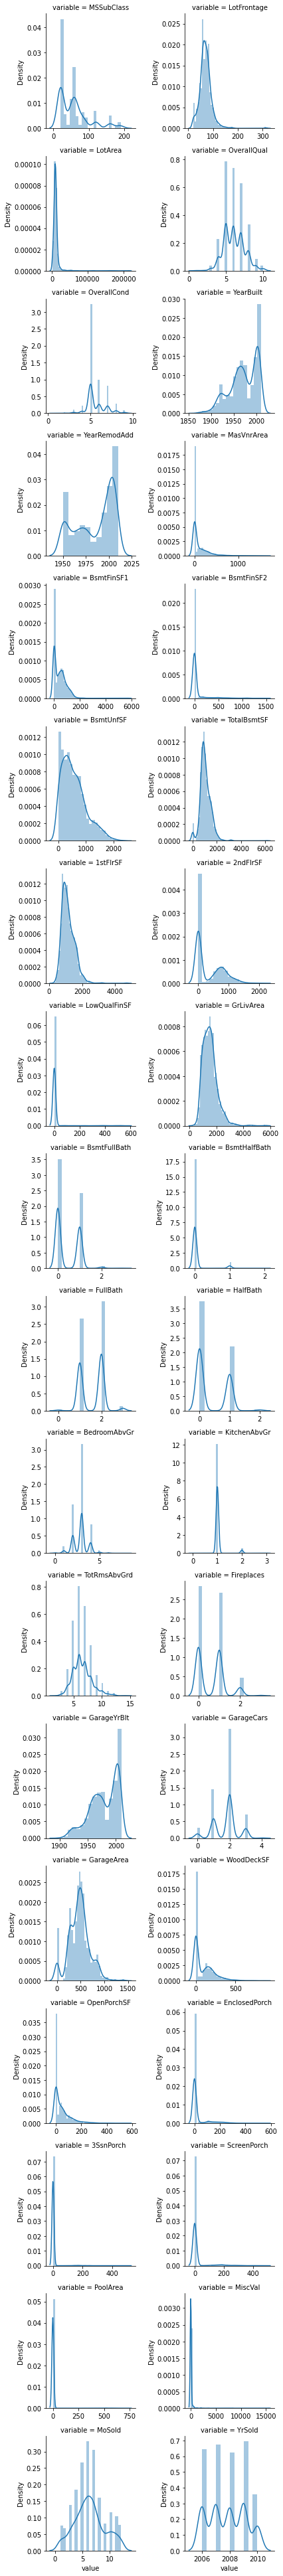

In [ ]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')

qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


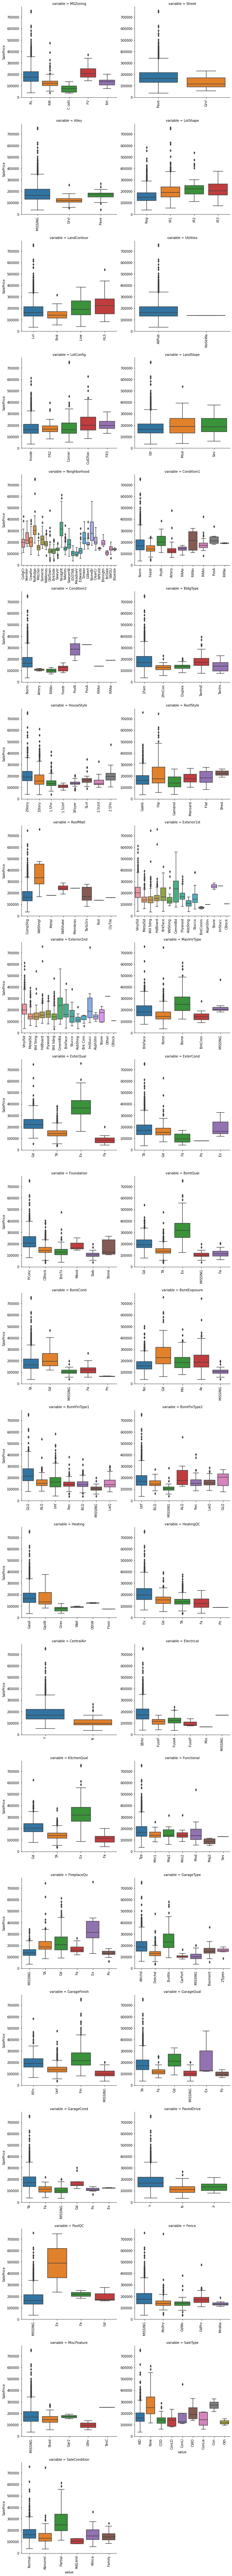

In [ ]:
for c in qualitative:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [ ]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "SalePrice")

There are lots of nonlinearities this may be the cause why some variables wont be selected by Lasso/Lars. Some factors like YearBuilt, 1stFlrSF, 2ndFlrSF, Neighborhood_E look like they would benefit from adding quadratic term to regression. But on the other hand this will most probably provoke overfit.

# Price Segments
It is possible that correlations shift with change of SalePrice.

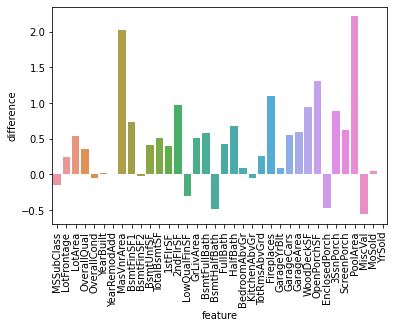

In [ ]:
features = quantitative

standard = train[train['SalePrice'] < 200000]
pricey = train[train['SalePrice'] >= 200000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean())/(standard[f].fillna(0.).mean())
                      for f in features]

sns.barplot(data=diff, x='feature', y='difference')
x=plt.xticks(rotation=90)

# Clustering

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


0.749596750042899


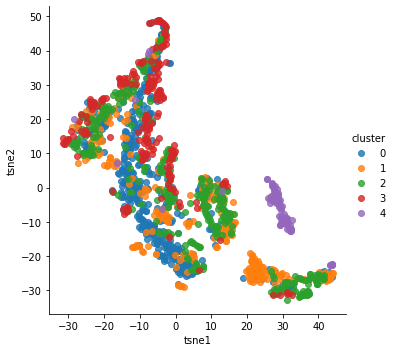

In [ ]:
features = quantitative + qual_encoded
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = train[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

In [ ]:
# Concat the train and test
df = pd.concat((train,test))
df.shape

(2919, 123)

# Exploratory Data Analysis (EDA)

In [ ]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
Id                                                                       
1           60       RL         65.0     8450   Pave  MISSING      Reg   
2           20       RL         80.0     9600   Pave  MISSING      Reg   
3           60       RL         68.0    11250   Pave  MISSING      IR1   
4           70       RL         60.0     9550   Pave  MISSING      IR1   
5           60       RL         84.0    14260   Pave  MISSING      IR1   

   LandContour Utilities LotConfig  ... GarageType_E GarageFinish_E  \
Id                                  ...                               
1          Lvl    AllPub    Inside  ...          6.0            3.0   
2          Lvl    AllPub       FR2  ...          6.0            3.0   
3          Lvl    AllPub    Inside  ...          6.0            3.0   
4          Lvl    AllPub    Corner  ...          3.0            2.0   
5          Lvl    AllPub       FR2  ...          6.0            3.0   

   GarageQual_E GarageCond_E PavedDrive_E PoolQC_E  Fence_E  MiscFeature_E  \
Id                                                                           
1           4.0          6.0          3.0      1.0      5.0            4.0   
2           4.0          6.0          3.0      1.0      5.0            4.0   
3           4.0          6.0          3.0      1.0      5.0            4.0   
4           4.0          6.0          3.0      1.0      5.0            4.0   
5           4.0          6.0          3.0      1.0      5.0            4.0   

    SaleType_E  SaleCondition_E  
Id                               
1          5.0              5.0  
2          5.0              5.0  
3          5.0              5.0  
4          5.0              2.0  
5          5.0              5.0  

[5 rows x 123 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Columns: 123 entries, MSSubClass to SaleCondition_E
dtypes: float64(55), int64(25), object(43)
memory usage: 2.8+ MB


In [ ]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  2919.000000  2433.000000    2919.000000  2919.000000  2919.000000   
mean     57.137718    69.305795   10168.114080     6.089072     5.564577   
std      42.517628    23.344905    7886.996359     1.409947     1.113131   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7478.000000     5.000000     5.000000   
50%      50.000000    68.000000    9453.000000     6.000000     5.000000   
75%      70.000000    80.000000   11570.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  2919.000000   2919.000000  2896.000000  2918.000000  2918.000000  ...   
mean   1971.312778   1984.264474   102.201312   441.423235    49.582248  ...   
std      30.291442     20.894344   179.334253   455.610826   169.205611  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1953.500000   1965.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1993.000000     0.000000   368.500000     0.000000  ...   
75%    2001.000000   2004.000000   164.000000   733.000000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1526.000000  ...   

       GarageType_E  GarageFinish_E  GarageQual_E  GarageCond_E  PavedDrive_E  \
count   1460.000000     1460.000000   1460.000000   1460.000000   1460.000000   
mean       4.941781        2.715753      3.863699      5.622603      2.856164   
std        1.686143        0.892831      0.522211      1.244881      0.496592   
min        1.000000        1.000000      1.000000      1.000000      1.000000   
25%        3.000000        2.000000      4.000000      6.000000      3.000000   
50%        6.000000        3.000000      4.000000      6.000000      3.000000   
75%        6.000000        3.000000      4.000000      6.000000      3.000000   
max        7.000000        4.000000      6.000000      6.000000      3.000000   

          PoolQC_E      Fence_E  MiscFeature_E   SaleType_E  SaleCondition_E  
count  1460.000000  1460.000000    1460.000000  1460.000000      1460.000000  
mean      1.008904     4.603425       3.928082     5.284247         4.831507  
std       0.140703     0.875914       0.378888     1.189697         0.887253  
min       1.000000     1.000000       1.000000     1.000000         1.000000  
25%       1.000000     5.000000       4.000000     5.000000         5.000000  
50%       1.000000     5.000000       4.000000     5.000000         5.000000  
75%       1.000000     5.000000       4.000000     5.000000         5.000000  
max       4.000000     5.000000       5.000000     9.000000         6.000000  

[8 rows x 80 columns]

In [ ]:
df.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning_E', 'Street_E', 'Alley_E',
       'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E',
       'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E',
       'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E',
       'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E',
       'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E',
       'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFi

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

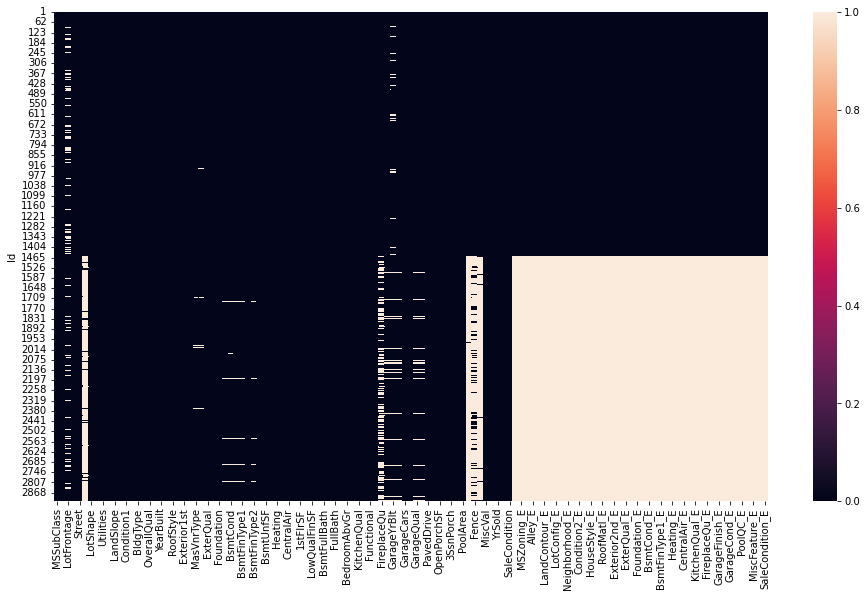

In [ ]:
#Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

These white cells are showing the null values

In [ ]:
# Get the percentages of null value
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass          0.000000
MSZoning            0.137033
LotFrontage        16.649538
LotArea             0.000000
Street              0.000000
                     ...    
PoolQC_E           49.982871
Fence_E            49.982871
MiscFeature_E      49.982871
SaleType_E         49.982871
SaleCondition_E    49.982871
Length: 123, dtype: float64

In [ ]:
col_for_drop = null_percent[null_percent > 20].keys() # if the null value % 20 or > 20 so need to drop it
# drop columns
df = df.drop(col_for_drop, "columns")
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


(2919, 74)

In [ ]:
# find the unique value count
for i in df.columns:
    print(i + "\t" + str(len(df[i].unique())))

MSSubClass	16
MSZoning	6
LotFrontage	129
LotArea	1951
Street	2
LotShape	4
LandContour	4
Utilities	3
LotConfig	5
LandSlope	3
Neighborhood	25
Condition1	9
Condition2	8
BldgType	5
HouseStyle	8
OverallQual	10
OverallCond	9
YearBuilt	118
YearRemodAdd	61
RoofStyle	6
RoofMatl	8
Exterior1st	16
Exterior2nd	17
MasVnrType	6
MasVnrArea	445
ExterQual	4
ExterCond	5
Foundation	6
BsmtQual	6
BsmtCond	6
BsmtExposure	6
BsmtFinType1	8
BsmtFinSF1	992
BsmtFinType2	8
BsmtFinSF2	273
BsmtUnfSF	1136
TotalBsmtSF	1059
Heating	6
HeatingQC	5
CentralAir	2
Electrical	6
1stFlrSF	1083
2ndFlrSF	635
LowQualFinSF	36
GrLivArea	1292
BsmtFullBath	5
BsmtHalfBath	4
FullBath	5
HalfBath	3
BedroomAbvGr	8
KitchenAbvGr	4
KitchenQual	5
TotRmsAbvGrd	14
Functional	8
Fireplaces	5
GarageType	8
GarageYrBlt	104
GarageFinish	5
GarageCars	7
GarageArea	604
GarageQual	7
GarageCond	7
PavedDrive	3
WoodDeckSF	379
OpenPorchSF	252
EnclosedPorch	183
3SsnPorch	31
ScreenPorch	121
PoolArea	14
MiscVal	38
MoSold	12
YrSold	5
SaleType	10
SaleCondition	6


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


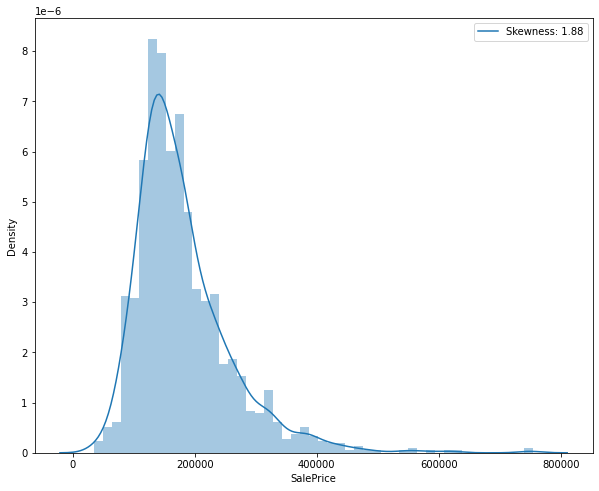

In [ ]:
# Plot the distplot of target
plt.figure(figsize=(10,8))
bar = sns.distplot(train["SalePrice"])
bar.legend(["Skewness: {:.2f}".format(train['SalePrice'].skew())])

(80.5, -0.5)

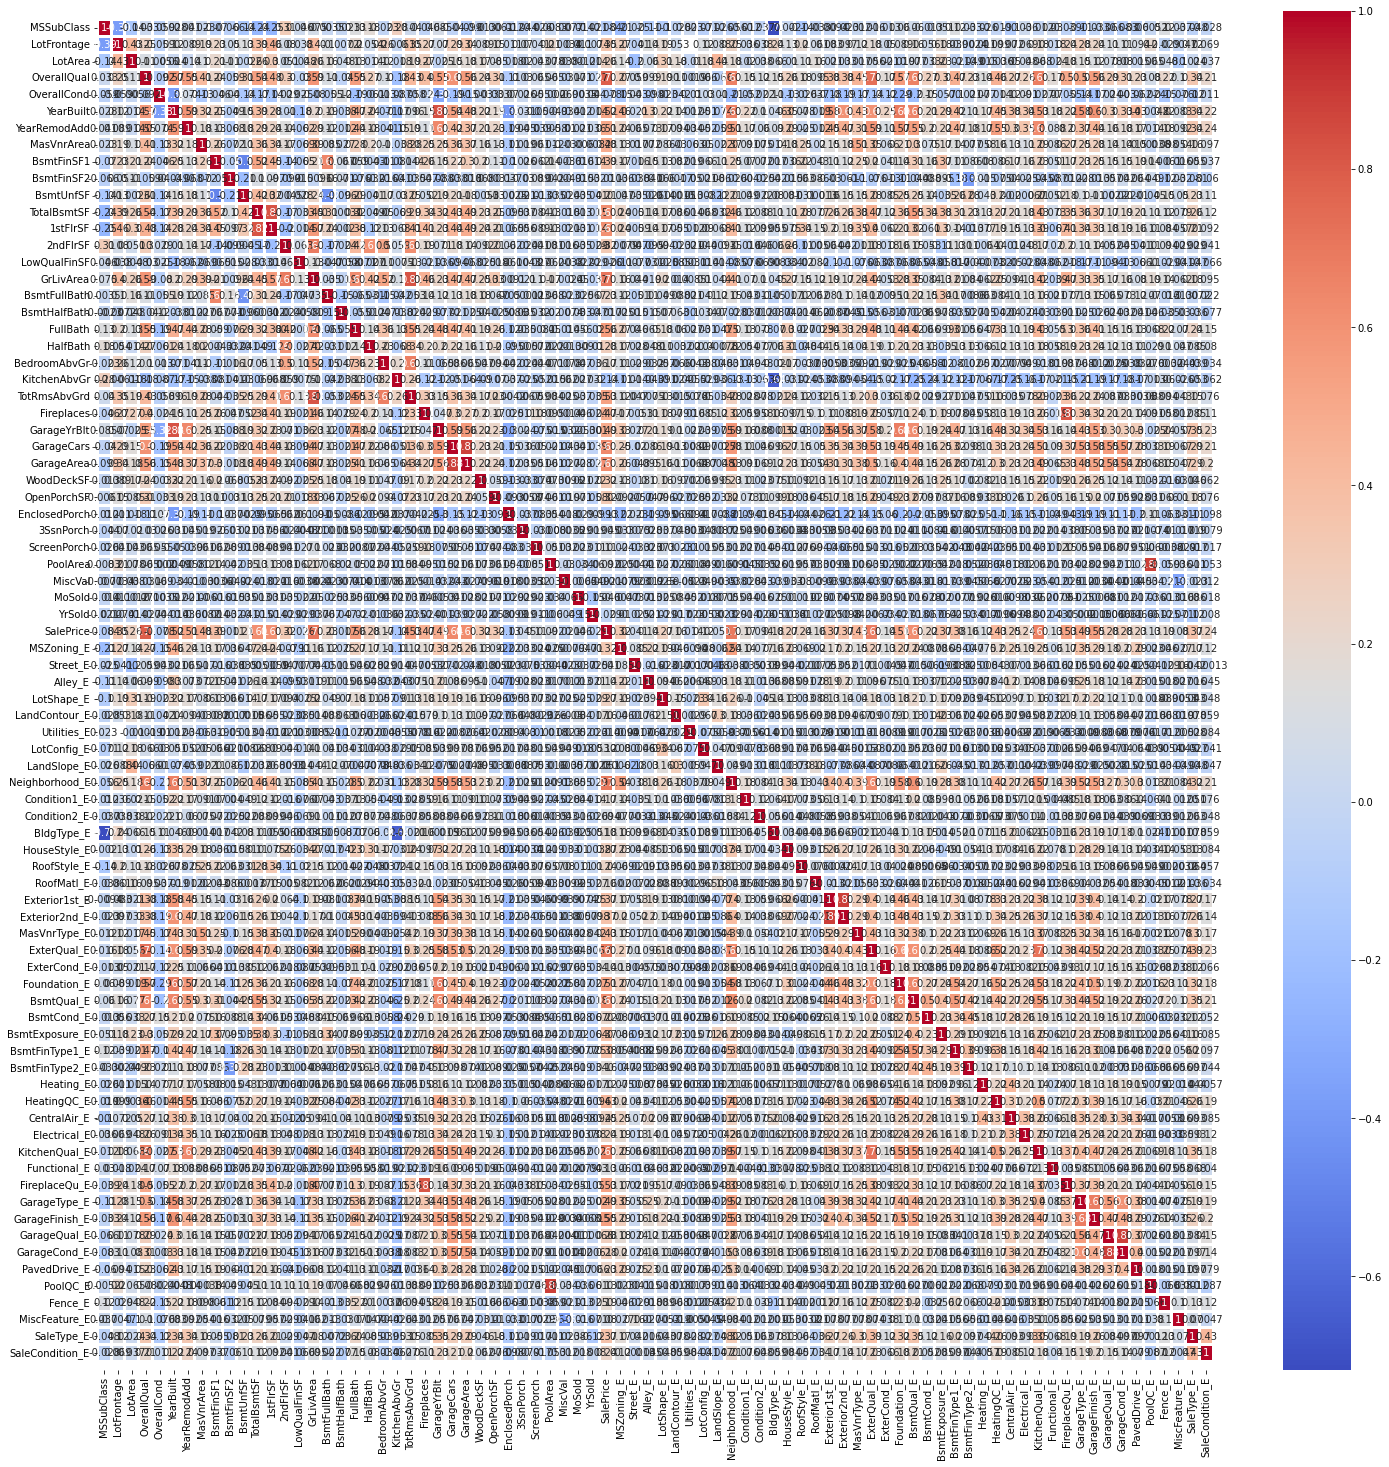

In [ ]:
# correlation heatmap
plt.figure(figsize=(25,25))
ax = sns.heatmap(train.corr(), cmap = "coolwarm", annot=True, linewidth=2)

# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'MSZoning_E',
       'Neighborhood_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E',
       'ExterQual_E', 'Foundation_E', 'BsmtQual_E', 'BsmtExposure_E',
       'BsmtFinType1_E', 'HeatingQC_E', 'KitchenQual_E', 'FireplaceQu_E',
       'GarageType_E', 'GarageFinish_E', 'SaleType_E'],
      dtype='object')


(35.5, -0.5)

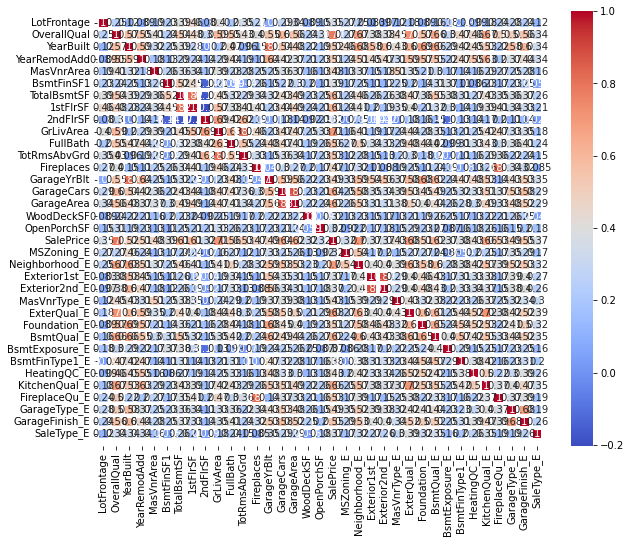

In [ ]:
# correlation heatmap of higly correlated features with SalePrice
hig_corr = train.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.3]
print(hig_corr_features)

plt.figure(figsize=(10,8))
ax = sns.heatmap(train[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

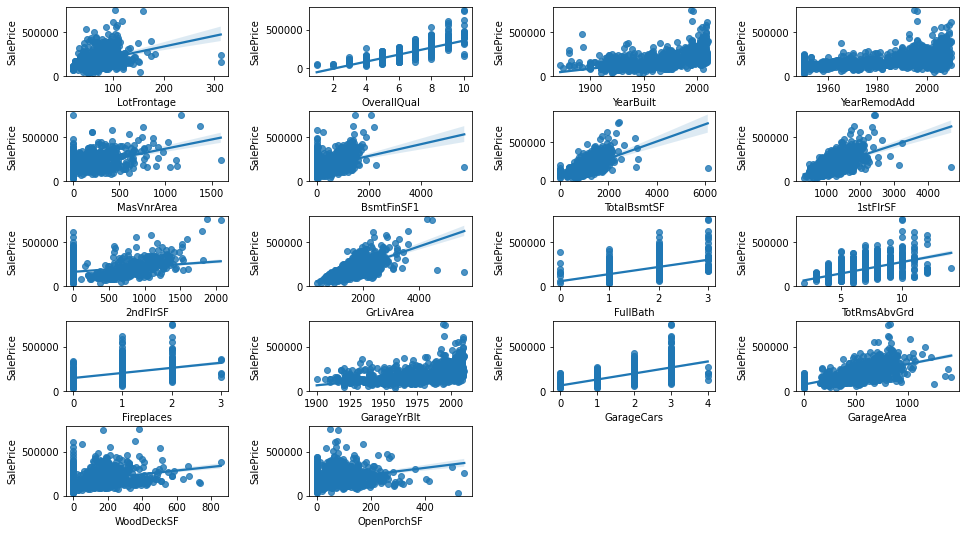

In [ ]:
# Plot regplot to get the nature of highly correlated data
plt.figure(figsize=(16,9))
for i in range(len(hig_corr_features)):
    if i <= 17:
        plt.subplot(5,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data=train, x = hig_corr_features[i], y = 'SalePrice')

# Handling Missing Value

Handling missing value of Bsmt feature

In [ ]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 74, dtype: int64

In [ ]:
df['LotFrontage'].fillna(np.mean(df['LotFrontage']), inplace=True)

In [ ]:
def fill_null(values):
    type = values[0]
    area = values[1]
    if pd.isnull(type):
        return "None",0
    else:
        return values

df[['MasVnrType','MasVnrArea']] = df[['MasVnrType','MasVnrArea']].apply(fill_null, axis=1)

In [ ]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [ ]:
df['GarageType'].fillna('No',inplace=True) # fill no that doens't have any garage type
df['GarageYrBlt'].fillna(0,inplace=True) # fill 0 that doesn't have any garage yr build because they don't have any garage
df['GarageFinish'].fillna('No',inplace=True)
df['GarageQual'].fillna('No',inplace=True) 
# GarageCond is similar to GarageQual so no point in storing the same columns, we will drop it later.df
# Exterior2nd is similar to Exterior1st we will also drop it later

In [ ]:
df.drop('GarageCond', axis=1, inplace=True)
df.drop('Exterior2nd', axis=1, inplace=True)

Handeled the remaining null features

In [ ]:
df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace=True)
df['Utilities'].fillna(df['Utilities'].mode()[0], inplace=True)
df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace=True)
df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean(), inplace=True)
df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean(), inplace=True)
df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean(), inplace=True)
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(), inplace=True)
df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0], inplace=True)
df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0], inplace=True)
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace=True)
df['Functional'].fillna(df['Functional'].mode()[0], inplace=True)
df['GarageCars'].fillna(df['GarageCars'].mode()[0], inplace=True)
df['GarageArea'].fillna(df['GarageArea'].mean(), inplace=True)
df['SaleType'].fillna(df['SaleType'].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 72, dtype: int64

Now convert all object columns into numeric column

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [ ]:
for i in object_columns:
    df = pd.get_dummies(df, columns=[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Columns: 262 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(25), uint8(226)
memory usage: 1.5 MB


# scaling dataset with robust scaler as we know that there might be some outliers within the dataset.

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)

# Machine Learning Model Building

In [ ]:
train_len = len(train)

In [ ]:
X_train = df[:train_len]
X_test = df[train_len:]
y_train = train.SalePrice

X_train.shape, X_test.shape, y_train.shape

((1460, 262), (1459, 262), (1460,))

# Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45) # Split your data to k Folds
    r2 = make_scorer(r2_score) # r2_score is the R^2 (coefficient of determination) which used to evaluate the performance of linear Regression Model
    # formula is R^2 = 1-SS(res)/SS(tot)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2) # Evaluates the data and returns the score
    score = [r2_val_score.mean()]
    return score

# Linear Regression

In [ ]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

# L2, Ridge regression

In [ ]:
rdg = linear_model.Ridge()
test_model(rdg)

# L1, Lasso Regression

In [ ]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

# Support Vector Machine

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel= 'rbf')
test_model(svr_reg)

We got so low accuracy let's hyperparameter tuned this model. 

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
# params = {'kernel': ['linear', 'rbf', 'sigmoid'], 
#           'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#           'C': [0.1, 1, 10, 100, 1000], 
#           'epsilon': [1, 0.2, 0.1, 0.01, 0.001, 0.0001]}

# rand_search = RandomizedSearchCV(svr_reg, param_distributions=params, n_jobs=-1, cv=11) 
# rand_search.fit(X_train, y_train) 
# rand_search.best_params_

Note: It took so much time, that's why I comment it. These are the parameters I got from this hyperparameter tuning

In [ ]:
svr_reg= SVR(kernel='rbf', C=1000, epsilon=0.1, gamma=0.01)
test_model(svr_reg)

Still we didn't get much better accuracy

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
test_model(dt_reg)

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
test_model(rf_reg)

# Bagging and Boosting

In [ ]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=51)

In [ ]:
test_model(br_reg)

In [ ]:
test_model(gbr_reg)

# XG Boost

In [ ]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
test_model(xgb_reg)

[02:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:20:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:20:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[0.8376253233766913]

We got better accuracy with gradient boosting regression till now, let's submit this prediction with this as of now. 

# Submitting Prediction

In [ ]:
gbr_reg.fit(X_train, y_train)
y_pred = gbr_reg.predict(X_test).round(2)
y_pred

In [ ]:
ID = pd.Series(test.index)
ID

In [ ]:
submit_result = pd.concat([ID, pd.DataFrame(y_pred)], axis=1)
submit_result.columns=['Id', 'SalePrice']
submit_result

In [ ]:
submit_result.to_csv('submission.csv', index=False)
submit_result